<a href="https://colab.research.google.com/github/DuarteVn/profit_prediction/blob/main/Previs%C3%A3o_de_Lucros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



* Base de dados
  * Input (X): Temperatura
  * Output(Y): Lucro diário em dólares
  



# Etapa 1: Importação de Bibliotecas

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tf.__version__

'2.18.0'

# Etapa 2: Importação da Base de dados

In [2]:
#Permissão para acessar arquivos doo Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Leitura do arquivo csv
profit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Excel/ice_profit_prediction.csv')
profit_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
profit_df.info()
profit_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da Base de Dados

<Axes: xlabel='Temperature', ylabel='Revenue'>

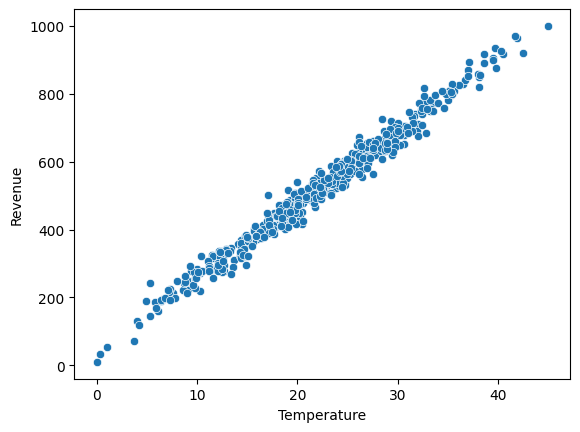

In [5]:
sns.scatterplot(x='Temperature', y='Revenue', data=profit_df)

# Etapa 4: Configuração da base de dados de treinamento

In [6]:
x_train = profit_df['Temperature']
y_train = profit_df['Revenue']

In [7]:
print(x_train.shape)
print(y_train.shape)


(500,)
(500,)


# Etapa 5: Criação e construção do modelo

In [8]:
# # O código abaixo funciona mas o TensorFlow recomenda usar
# o tf.keras.Input() como primeira camada ao usar Sequential() para
# seguir boas práticas do TensorFlow mais "moderno".

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [9]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [12]:
epochs_hist = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 270777.1562   
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 240119.6094 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 195398.8594 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167961.6250 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136175.1406 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 123734.8594 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96415.2266 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80317.3203 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63613.6641 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51582.2656 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40179.6016 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34086.5938 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26973.7051 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

# Avaliação do Modelo

In [13]:
epochs_hist.history.keys()

dict_keys(['loss'])

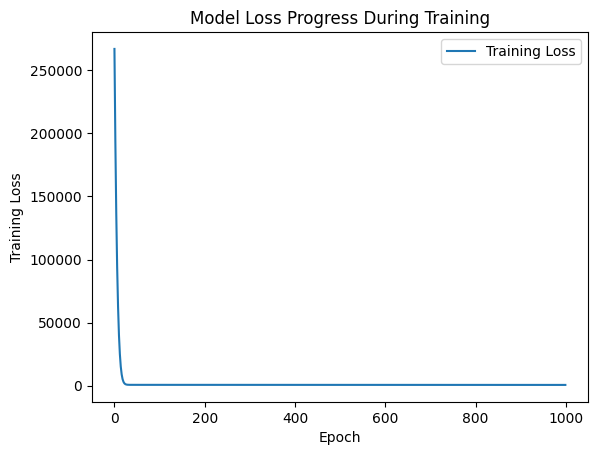

In [14]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])